# Investigating TMDB Movies Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction



The TMDB movies dataset is a big dataset of ~10,000 movies extracted from [https://www.themoviedb.org/](https://www.themoviedb.org/). The dataset contains movies from 1960 to 2015. The dataset has various columns about the details of the movies (see the <a href="#col_des">column description</a> below).Firstly the data is cleaned to be appropriate for the following analysis; the unnecessary columns are dropped. After preparing the data, the charactersitics of movies are investigated with respect to : 
1. The profit
2. The popularity
\

We find interesting features are associated with these movies.

## Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
df=pd.read_csv('tmdb-movies.csv')
df.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


### Inspecting data type in each column:

<a id='col_des'></a>
### Columns Descreption:

`id`, `imdb_id` : unique id or imdb id for each movie on TMDB (more about the popularity in this [link](https://developers.themoviedb.org/3/getting-started/popularity). <br>
`popularity`: a metric used to measure the popularity of the movie. <br>
`budget`:the total budget of the moviein USD. <br>
`revenue`:the total revenue of the movie in USD. <br>
`original_title`: the original title of the movie. <br>
`cast`:the names of the cast of the movie separated by "|". <br>
`homepage`: the website of the movie (if it existed). <br>
`director`:name(s) of the director(s) of the movie (separated by "|" if there are more than one director). <br>
`tagline`:a catchphrase describing the movie. <br>
`keywords`: keywords related to the movie. <br>
`overview`:summary of the plot of the movie. <br>
`runtime`:total runtime of the movie in minutes. <br>
`genres`: genres of the movie separated by "|". <br>
`production_companies`:production compan(y/ies) of the movie. <br>
`release_date`:release date of the movie. <br>
`vote_count`:number of voters of te movie. <br>
`vote_average`:the average user rating of the movie <br>
`release_year`:release year of the movie (from 1960 to 2015) <br>
`budget_adj`:the total budget of the moviein USD in terms of 2010 dollars, accounting for inflation over time.<br>
`revenue_adj`:the total budget of the movie in USD in terms of 2010 dollars, accounting for inflation over time.<br>

In [3]:
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

## Data Cleaning

### Droping duplicates

In [4]:
df.drop_duplicates(inplace=True)

### Droping unwanted columns from the dataframe and adding new columns:

In [5]:
df['main_genre']=df.genres.str.split(pat='|',expand=True)[0]
df['leading_actor']=df.cast.str.split(pat='|',expand=True)[0]
df['main_director']=df.director.str.split(pat='|',expand=True)[0]
df['profit']=df.revenue_adj-df.budget_adj
#four more columns added, see the description below.
df.drop(['id','imdb_id','cast','homepage','tagline','production_companies','overview','keywords','budget','revenue'],axis=1,inplace=True)
# The unnecessary columns in my analysis are dropped.
# The revenue and budget columns columns are dropped and the adjusted columns will be used.
df.release_date=pd.to_datetime(df.release_date)
df.head(2)

,popularity,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,main_genre,leading_actor,main_director,profit
0,32.985763,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,Action,Chris Pratt,Colin Trevorrow,1.254446e+09
1,28.419936,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,Action,Tom Hardy,George Miller,2.101614e+08


### New Columns Descreption:
`main_genre`: the main genre of the movie (the first genre in the `genres` list). <br>
`leading_actor`: the leading actor/actress of the movie (the first name in the `cast` list). <br>
`main_director`:the main director of the movie (if there are more than one director). <br>
`profit`:the net profet of the movie (calculated by profit=revenue-budget). <br>

In [6]:
print('The shape of the dataframe is' ,df.shape)
df.describe()

The shape of the dataframe is (10865, 15)


,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
count,10865.000000,10865.000000,10865.000000,10865.000000,10865.000000,1.086500e+04,1.086500e+04,1.086500e+04
mean,0.646446,102.071790,217.399632,5.975012,2001.321859,1.754989e+07,5.136900e+07,3.381911e+07
std,1.000231,31.382701,575.644627,0.935138,12.813260,3.430753e+07,1.446383e+08,1.252194e+08
min,0.000065,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00,-4.139124e+08
25%,0.207575,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.383831,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.713857,111.000000,146.000000,6.600000,2011.000000,2.085325e+07,3.370173e+07,1.293091e+07
max,32.985763,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09,2.750137e+09


### Dealing with NaN values:

In [7]:
df.isnull().sum()

popularity         0
original_title     0
director          44
runtime            0
genres            23
release_date       0
vote_count         0
vote_average       0
release_year       0
budget_adj         0
revenue_adj        0
main_genre        23
leading_actor     76
main_director     44
profit             0
dtype: int64

In [8]:
df.genres.fillna('unspecified genre',inplace=True)
df.main_genre.fillna('unspecified main genre',inplace=True)
df.director.fillna('unknown director',inplace=True)
df.main_director.fillna('unknown director',inplace=True)
df.leading_actor.fillna('unknown leading actor',inplace=True)

In [9]:
if df.isnull().sum().sum() == 0:
    print('TMDB dataframe now has no missing values !')

TMDB dataframe now has no missing values !


<a id='eda'></a>
## Exploratory Data Analysis

Firstly we can have a general look on the correlation between each two variables with the scatter matrix.

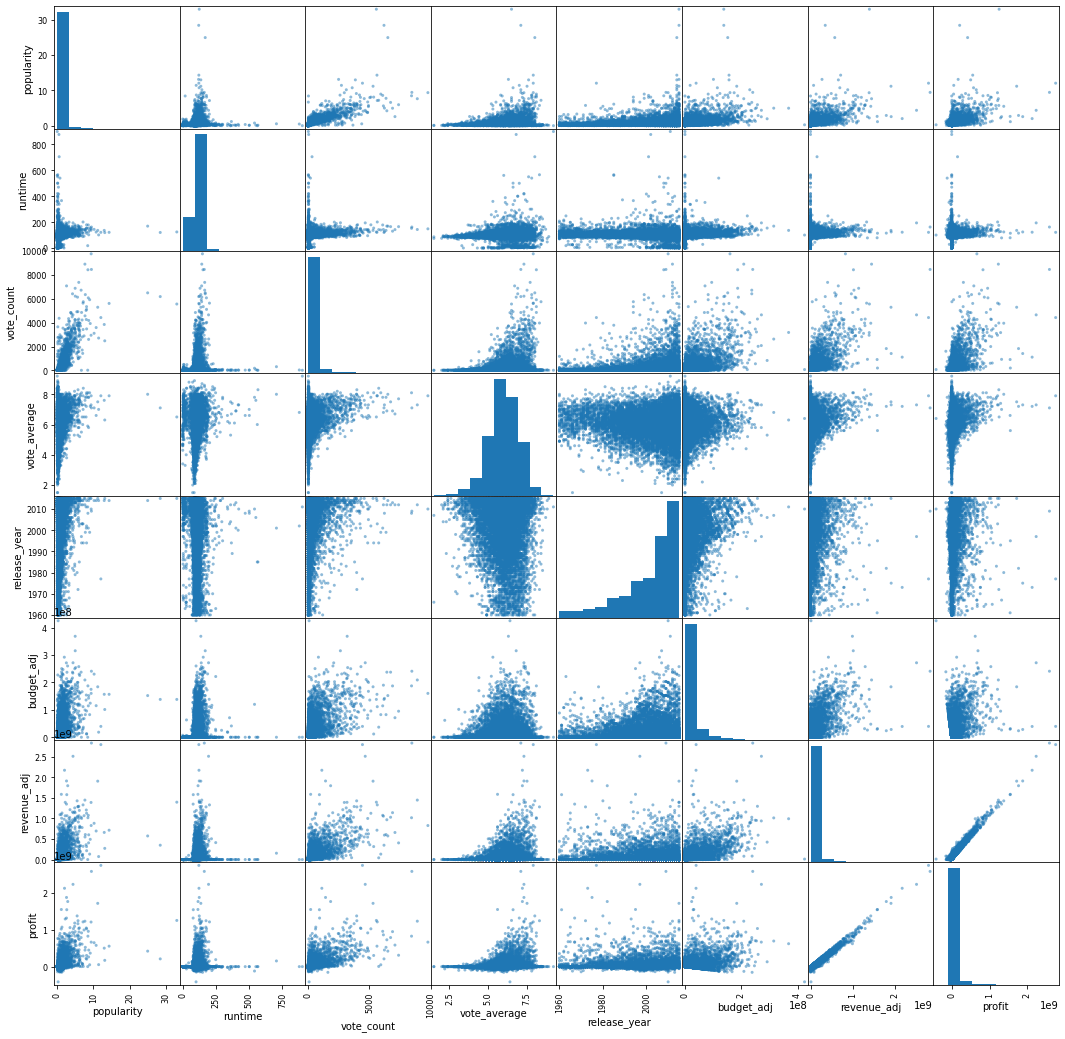

In [10]:
pd.plotting.scatter_matrix(df,figsize=(18,18));

### What are the characteristics associated with higher profit movies ?

Before we analyze the movies with higher profit, we find that that many movies have the value "0" in the `revenue_adj` and the `budget_adj` columns (the `profit` is also not accurate as a result). \
These rows will be dropped in this section.

In [11]:
df_nz=df[df['revenue_adj']!=0]
df_nz=df_nz[df_nz['budget_adj']!=0]
# df_nz is now defined for this section (nz for nonzero)
# the new dataframe has no zeros in the adjusted budget and revenue columns.
df_nz.shape

(3854, 15)

#### Firstly, we need to categorize the movies based on the profit column.

The following cell is defining a function that devides the numerical column to four categories based on its four quartiles.

In [12]:
def categorize_quartiles(df,column_label,bin_names):
    bin_edges=[
    df[column_label].describe()['min'],
    df[column_label].describe()['25%'],
    df[column_label].describe()['50%'],
    df[column_label].describe()['75%'],
    df[column_label].describe()['max']]
    categorized_column_label="categorized_"+column_label
    df[categorized_column_label]=pd.cut(df[column_label], bin_edges, labels=bin_names)
    return df

In [13]:
bin_names=['Big Loss','Loss','Medium Profit','High Profit']
df_nz=categorize_quartiles(df_nz,'profit',bin_names)
df_nz.head(3)

,popularity,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,main_genre,leading_actor,main_director,profit,categorized_profit
0,32.985763,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,Action,Chris Pratt,Colin Trevorrow,1.254446e+09,High Profit
1,28.419936,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,Action,Tom Hardy,George Miller,2.101614e+08,High Profit
2,13.112507,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08,Adventure,Shailene Woodley,Robert Schwentke,1.704191e+08,High Profit


#### Here you can find the most frequent directors in each profit category:

In [14]:
df_nz.groupby('categorized_profit').agg(lambda x:x.value_counts().index[0])['main_director']

categorized_profit
Big Loss             Renny Harlin
Loss                  Kevin Smith
Medium Profit      Clint Eastwood
High Profit      Steven Spielberg
Name: main_director, dtype: object

Steven Spielberg is the director with most movies that made high profit.

#### Here you can find the most frequent genre in each profit category:

In [15]:
df_nz.groupby('categorized_profit').agg(lambda x:x.value_counts().index[0])['main_genre']

categorized_profit
Big Loss          Drama
Loss              Drama
Medium Profit    Comedy
High Profit      Action
Name: main_genre, dtype: object

We can see clearly that a high profit movie is more likely to be an action movie.

#### Here you can find the years of the biggest losses and largest profits:

In [16]:
df_nz.groupby('categorized_profit').agg(lambda x:x.value_counts().index[0])['release_year'];

#### Now you can find a piechart of the  main genre of the movie based on its categorized profit.

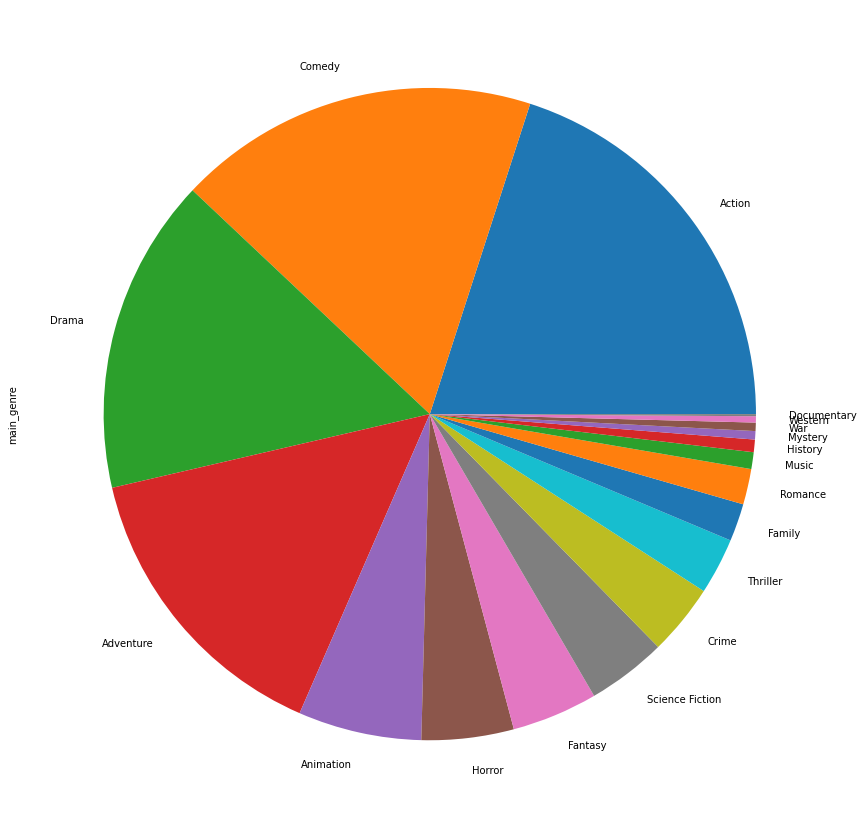

In [17]:
df_nz[df_nz['categorized_profit']=='High Profit']['main_genre'].value_counts().plot.pie(figsize=(15,15));

Note that the majority of high profit movies are action, comedy, drama or adventure.

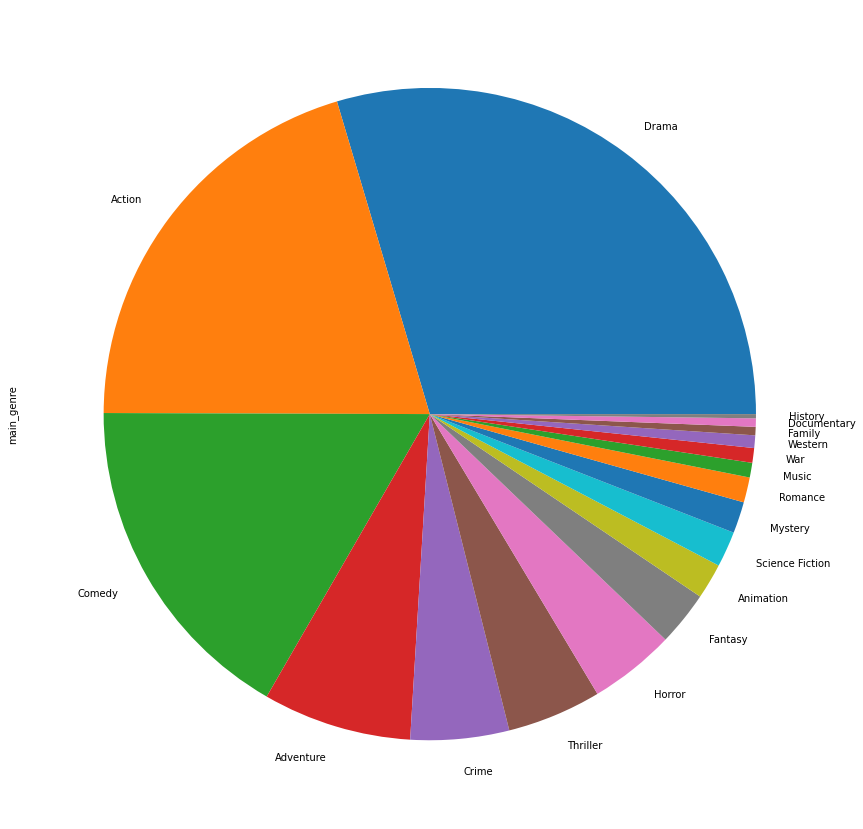

In [18]:
df_nz[df_nz['categorized_profit']=='Big Loss']['main_genre'].value_counts().plot.pie(figsize=(15,15));

In [19]:
high_profit_runtime_mean=df_nz[df_nz['categorized_profit']=='High Profit']['runtime'].mean()
print('The average runtime of a high profit movie is {} minutes'.format(int(high_profit_runtime_mean)))

The average runtime of a high profit movie is 116 minutes


### What are the characteristics associated popular movies ?

In [20]:
popularity_bin_names=['Not Popular','Somewhat Popular','Popular','Very Popular']
df=categorize_quartiles(df,'popularity',popularity_bin_names)
df.head()

,popularity,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,main_genre,leading_actor,main_director,profit,categorized_popularity
0,32.985763,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,Action,Chris Pratt,Colin Trevorrow,1.254446e+09,Very Popular
1,28.419936,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,Action,Tom Hardy,George Miller,2.101614e+08,Very Popular
2,13.112507,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08,Adventure,Shailene Woodley,Robert Schwentke,1.704191e+08,Very Popular
3,11.173104,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09,Action,Harrison Ford,J.J. Abrams,1.718723e+09,Very Popular
4,9.335014,Furious 7,James Wan,137,Action|Crime|Thriller,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09,Action,Vin Diesel,James Wan,1.210949e+09,Very Popular


Who is the director whose movies are more likely to be very popular ?

In [21]:
df.groupby('categorized_popularity').agg(lambda x:x.value_counts().index[0])['main_director']

categorized_popularity
Not Popular         unknown director
Somewhat Popular      Barry Levinson
Popular                  Woody Allen
Very Popular        Steven Spielberg
Name: main_director, dtype: object

#### Which year has the most popular movies?

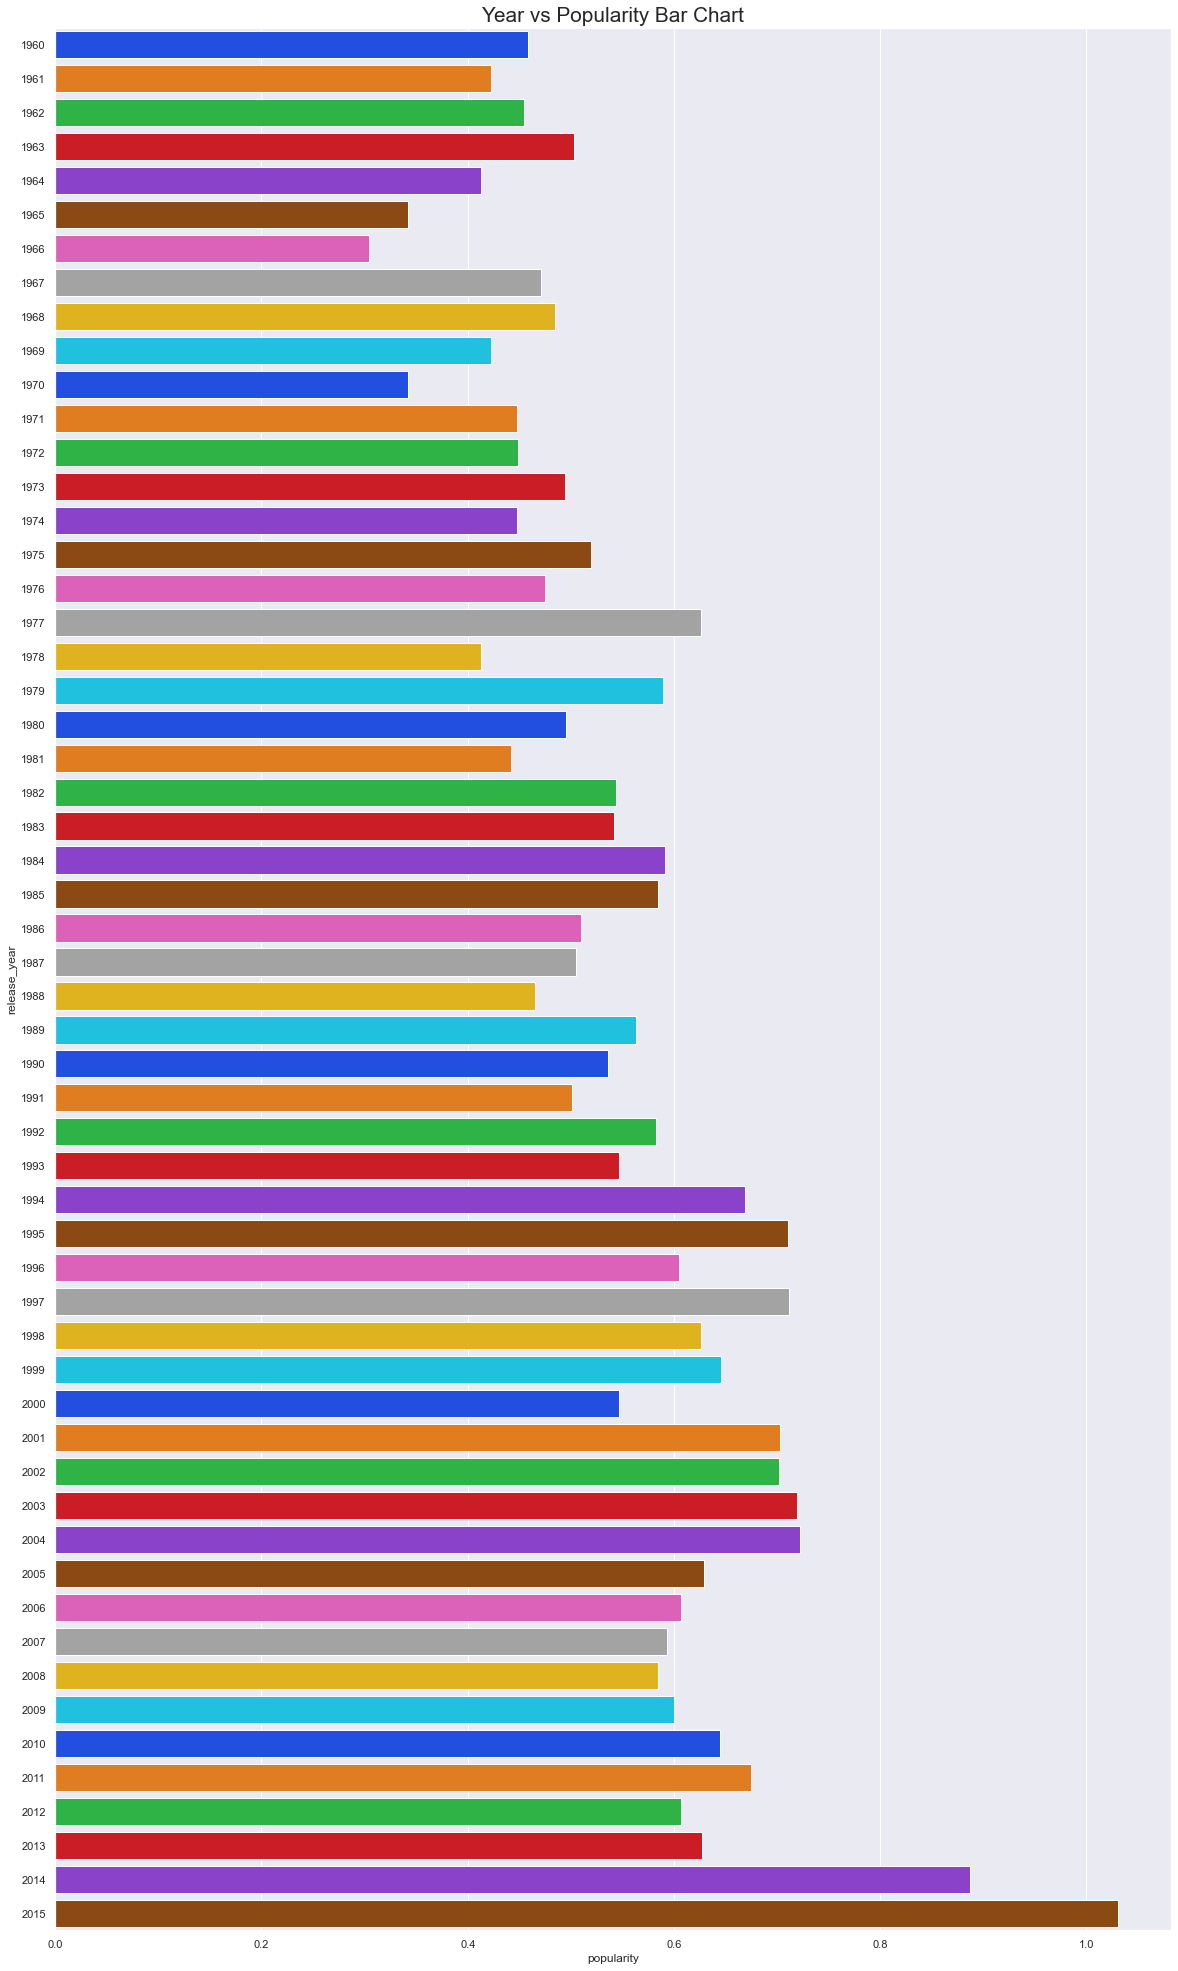

In [22]:
year_vs_pop_mean=df.groupby('release_year')['popularity'].mean()
sns.set(rc={'figure.figsize':(20,35)})
sns.barplot(x=year_vs_pop_mean, y=year_vs_pop_mean.index,orient='h', palette="bright").set_title("Year vs Popularity Bar Chart",fontsize='xx-large');

Obviously, from the previous plot2015 and 2014 are the years with the most popular movies respectively.

#### What is the month with the most popular movies?

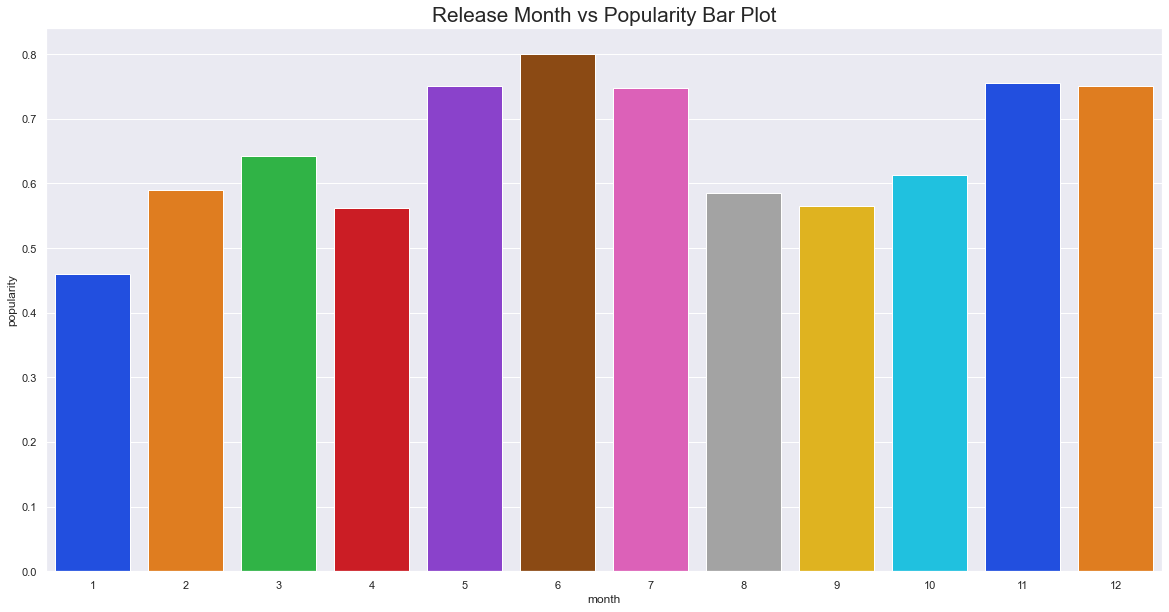

In [23]:
df['month'] = df['release_date'].dt.month
month_pop_mean=df.groupby('month')['popularity'].mean()
sns.set(rc={'figure.figsize':(20,10)})
sns.barplot(x=month_pop_mean.index, y=month_pop_mean, palette="bright").set_title("Release Month vs Popularity Bar Plot",fontsize='xx-large');

The middle of the year and the end of the year have the most popular movies.

<a id='conclusions'></a>
## Conclusions

After investigating which movies are more likely to have high or low profit we find that: 
 - Steven Spielberg is the director with most movies that made high profit.
 - Renny Harlin is the director with most movies that were big losses.
 - The most frequent genre in high profit movies is action while the most fequent genre in losses is drama.
 - The majority of high profit movies are action, comedy, drama or adventure.
 - The average runtime of a high profit movie is 116 minutes.


After investigating which movies are more likely to be popular we find that: 
 - Steven Spielberg is the director with most movies are very popular.
 - 2015 and 2014 are the years with the highest average popularity score respectively
 - 1966 is the year with the least average popularity score .
 - The middle of the year and the end of the year have the most popular movies.

#### Limitations 
 - The dataset has many missing values for the budget, revenue and profit.
 - The drama and action genre are very frequent so they appear in the most popular, least popular and different profit categories  of the movies.
 - The charachteristics of the movie does not guarantee the success or the faliure of it.